<a href="https://colab.research.google.com/github/jdelebec/Advanced_machine_learning_project1/blob/main/Advanced_Machine_Learning_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
nltk.download("stopwords")

In [ ]:
!pip install lxml

In [ ]:
import bs4
from bs4 import BeautifulSoup as bs
import lxml
import pandas as pd

In [ ]:
content = []
with open("corpus_taln_v1.tei.xml", "r") as file:  
    content = file.readlines()
    content = "".join(content)
    soup = bs(content, "lxml")

In [ ]:
def Get_text(soup):

  dic = {}

  #================================================================

  title = soup.find("title").get_text().replace("\n\t", "")
  author = soup.find("author")
  author_names = author.find_all("name")
  publication_place = soup.find("pubplace").get_text()
  publication_date = soup.find("publicationstmt").find("date").get_text()
  editor_name = soup.find("editor").find("name").get_text()
  monogr_title = soup.find("monogr").find("title").get_text()
  monogr_date = soup.find("monogr").find("date").get_text()
  abstract = soup.find("text").find_all("div", {"type": "abstract"})
  abstract_fr = abstract[0].find("p").get_text().replace("\n\t", "")
  abstract_eng = abstract[1].find("p").get_text().replace("\n\t", "")
  keywords = soup.find("text").find_all("div", {"type": "keywords"})
  keywords_fr = keywords[0].find("p").get_text().replace("\n\t", "")
  keywords_eng = keywords[1].find("p").get_text().replace("\n\t", "")
  sections = soup.find_all("div", {"type": "section"})
  tab = []

  #============================================================

  # Introduction - Sections - Conclusion
  sections = soup.find_all("div", {"type": "section"})
  for section in sections:
    # title section
    try:
      title_sec = section.get_text().split("\n")[2]
      tab.append(title_sec)
    except:
      pass
    # paragraph section
    try:
      parag_sec = section.find("p").get_text().replace("\n\t", "")
      tab.append(parag_sec)
    except:
      pass
    # Subsection
    try:
      subsections = section.find_all("div", {"type": "subsection"})
      for sub in subsections:
        # title subsection
        title_sub = sub.get_text().split("\n")[2]
        tab.append(title_sub)
      
        # paragraphs subsection
        paragraphs = sub.find_all("p")
        for parag in paragraphs:
          tab.append(parag.get_text().replace("\n\t", ""))
        
        # sub note
        try:
          notes = sub.find_all("note")
          for note in notes:
            tab.append(note.get_text())
        except:
          pass
    
    except:
      pass
    
    # note
    try:
      notes = section.find_all("note")
      for note in notes:
        tab.append(note.get_text())
    except:
      pass


  # Bibl

  try:
    bibl = soup.find("bibl").get_text()
    tab.append(bibl)
  except:
    pass

  #===============================================================

  dic["title"] = title
  for index, name in enumerate(author_names):
    dic["author_name_" + str(index)] = name.get_text()
  try:
    author_emails = author.find_all("email")
    for index, email in enumerate(author_emails):
      dic["author_email_" + str(index)] = email.get_text()
  except:
    dic["author_email"] = None
  dic["publication_place"] = publication_place
  dic["publication_date"] = publication_date
  dic["editor_name"] = editor_name
  dic["monogr_title"] = monogr_title
  dic["monogr_date"] = monogr_date
  dic["abstract_fr"] = abstract_fr
  dic["abstract_eng"] = abstract_eng
  dic["keywords_fr"] = keywords_fr
  dic["keywords_eng"] = keywords_eng
  dic["text"] = " ".join(str(elem) for elem in tab)

  #>
  return dic


In [ ]:
corpus = []
texts = soup.find_all("tei")
for text in texts:
  corpus.append(Get_text(text))

In [ ]:
corpus

In [ ]:
df = pd.DataFrame(corpus)

In [ ]:
df.head()

,title,author_name_0,author_name_1,author_email_0,author_email_1,publication_place,publication_date,editor_name,monogr_title,monogr_date,abstract_fr,abstract_eng,keywords_fr,keywords_eng,text,author_name_2,author_email_2,author_name_3,author_name_4,author_name_5,author_email_3,author_email_4,author_email_5,author_name_6,author_name_7,author_email_6,author_email_7,author_name_8,author_name_9,author_email_8,author_email_9,author_name_10,author_name_11,author_name_12,author_name_13,author_name_14,author_name_15,author_name_16,author_email_10,author_email_11,author_email_12,author_email_13,author_email_14,author_email_15,author_email_16
0,\nÉléments de conception d'un système d'interp...,Delphine Battistelli,Cyril Valliez,\nbattiste@msh-paris.fr\n,\nvalliez@msh-paris.fr\n,Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,1997,\nNous considérons dans notre travail la tâche...,None,None,None,Architecture globale du système \nLe modèle de...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\nInformatisation du dictionnaire explicatif e...,Gilles Sérasset,NaN,\nGilles.Serasset@imag.fr\n,NaN,Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,1997,\nNous donnons ici un aperçu du logiciel DECID...,None,None,None,Introduction \nDans le domaine de l'ingénieri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,\nConstruction d'une représentation sémantique...,Pierre Zweigenbaum,Jacques Bouaud,\npz@biomath.jussieu.fr\n,\njb@biomath.jussieu.fr\n,Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,1997,\nDiverses méthodes ont été proposées pour con...,None,None,None,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,\nSystèmes de types pour la (lambda-)DRT ascen...,Pascal Amsili,Nabil Hathout,\namsili@linguist.jussieu.fr\n,\nhathout@inalf.cnrs.fr\n,Paris,1998,Pierre Zweigenbaum,5e conférence sur le Traitement Automatique de...,1998,\nLe terme de lambda-DRT désigne un ensemble d...,None,None,None,Introduction \nLa « Théorie des Représentation...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\nUne grammaire TAG vue comme une grammaire Se...,Marie-Hélène Candito,Sylvain Kahane,\nmarie-helene.candito@linguist.jussieu.fr\n,\nsk@ccr.jussieu.fr\n,Paris,1998,Pierre Zweigenbaum,5e conférence sur le Traitement Automatique de...,1998,"\nDans cet article, nous comparons deux modèle...",None,None,None,Introduction \nTAG est un formalisme initialem...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!python -m spacy download fr_core_news_sm

     |████████████████████████████████| 14.7MB 523kB/s 
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-2.2.5-cp36-none-any.whl size=14727027 sha256=2c0458524ae4c62752bb75f211f5eaec8c9ccff38418a30a99719123b3664b44
  Stored in directory: /tmp/pip-ephem-wheel-cache-lww2dqwk/wheels/46/1b/e6/29b020e3f9420a24c3f463343afe5136aaaf955dbc9e46dfc5
Successfully built fr-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [ ]:
# Packages for processing

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords
french_stopwords = set(stopwords.words("french"))
import unicodedata
import re
import spacy
import fr_core_news_sm
nlp = fr_core_news_sm.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Processing

def remove_accents(text):
    
    norm = unicodedata.normalize('NFKD', str(text))
    ascii = norm.encode('ascii', 'ignore')
    text = ascii.decode('utf-8', 'ignore')
    return text

def lower_letters(text):
    
    return text.lower()

def drop_slash_n(text):
    
    return re.sub(r"\n", "", text)

def drop_special_carac(text):
    
    return re.sub(r"[^a-zA-Z\d\s]", " ", text)

def drop_extra_space(text):
    
    return re.sub(r"s{2,}", " ", text)

def remove_stop_words(text):
    
    text = word_tokenize(text)
    text = " ".join([word for word in text if not word in french_stopwords])
    return text

def lemmatize(text):
    
    text = nlp(text)
    text = " ".join([word.lemma_ for word in text])
    return text

def drop_double_space(text):
    return re.sub(' +', ' ', text)

def drop_single_char(text):
    return re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', text)

def drop_brackets(text):
    return re.sub(r"\[(.*?)\]", "", text)

# =============================================================================

# Wrapper 

def processing1(text):
    
    text = remove_accents(text)
    text = lower_letters(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = drop_extra_space(text)
    text = remove_stop_words(text)
    text = lemmatize(text)
    
    return text

def processing2(text):
    
    text = remove_accents(text)
    text = lower_letters(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = remove_stop_words(text)
    text = lemmatize(text)
     
    return text

def processing3(text):
    
    text = lower_letters(text)
    text = remove_accents(text)
    text = remove_stop_words(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = lemmatize(text)
    
    return text

def processing4(text):
    
    text = remove_accents(text)
    text = lower_letters(text)
    text = drop_slash_n(text)
    
    return text

def processing5(text):
    
    text = lower_letters(text)
    text = remove_stop_words(text)
    text = remove_accents(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = lemmatize(text)
    
    return text

def processing6(text):
    
    text = lower_letters(text)
    text = lemmatize(text)
    text = remove_stop_words(text)
    text = remove_accents(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)

def processing7(text):
    text = drop_brackets(text)
    text = lower_letters(text)
    text = remove_stop_words(text)
    text = remove_accents(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = drop_double_space(text)
    text = drop_single_char(text)
    
    return text

In [ ]:
df2 = df
df2["abstract_fr"][0]

'\nNous considérons dans notre travail la tâche du traitement automatique visant à construire, à partir de textes issus d\'un corpus de constats d\'accidents de la route, des interprétations compatibles avec ces derniers, et à en proposer des illustrations sous forme de séquences d\'images fixes. Notre recherche est le fruit d\'une collaboration entre un laboratoire universitaire et une entreprise. Elle prend appui sur le modèle de la Grammaire Applicative et Cognitive [DES 90], qui vise en particulier à "expliquer", à un certain niveau cognitif, les transferts entre représentations imagées et verbales. Pour une revue de la question relative à la "transcription automatique Verbal-Image", nous renvoyons à [ARN 90] ; et plus particulièrement aux travaux de C. Vandeloise [VAN 87] et du groupe "Langue, Raisonnement, Calcul" de l\'Université Paul Sabatier [AUR 90, SAB 95] ainsi qu\'aux approches proposées dans [ARN 93] et dans le système SPRINT [YAM 92]. Plus proches encore de nos préoccupa

In [ ]:
df["abstract_fr_proc_1"] = df.apply(lambda x: processing1(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_2"] = df.apply(lambda x: processing2(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_3"] = df.apply(lambda x: processing3(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_4"] = df.apply(lambda x: processing4(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_5"] = df.apply(lambda x: processing5(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_6"] = df.apply(lambda x: processing6(x["abstract_fr"]), axis=1)

In [ ]:
df["abstract_fr"][0]


'\nNous considérons dans notre travail la tâche du traitement automatique visant à construire, à partir de textes issus d\'un corpus de constats d\'accidents de la route, des interprétations compatibles avec ces derniers, et à en proposer des illustrations sous forme de séquences d\'images fixes. Notre recherche est le fruit d\'une collaboration entre un laboratoire universitaire et une entreprise. Elle prend appui sur le modèle de la Grammaire Applicative et Cognitive [DES 90], qui vise en particulier à "expliquer", à un certain niveau cognitif, les transferts entre représentations imagées et verbales. Pour une revue de la question relative à la "transcription automatique Verbal-Image", nous renvoyons à [ARN 90] ; et plus particulièrement aux travaux de C. Vandeloise [VAN 87] et du groupe "Langue, Raisonnement, Calcul" de l\'Université Paul Sabatier [AUR 90, SAB 95] ainsi qu\'aux approches proposées dans [ARN 93] et dans le système SPRINT [YAM 92]. Plus proches encore de nos préoccupa

In [ ]:
df["abstract_fr_proc_6"] = df.apply(lambda x: processing7(x["abstract_fr"]), axis=1)

In [ ]:
df["abstract_fr_proc_6"][0]

'considerons travail tache traitement automatique visant construire partir textes issus un corpus constats accidents route interpretations compatibles derniers proposer illustrations sous forme sequences images fixes recherche fruit une collaboration entre laboratoire universitaire entreprise prend appui modele grammaire applicative cognitive 90 vise particulier expliquer certain niveau cognitif transferts entre representations imagees verbales revue question relative transcription automatique verbal image renvoyons arn 90 plus particulierement travaux vandeloise van 87 groupe langue raisonnement calcul universite paul sabatier aur 90 sab 95 ainsi qu aux approches proposees arn 93 systeme sprint yam 92 plus proches encore preoccupations victorri enjalbert enj 94 poi 95 posent probleme animation visuelle issue interpretation textes presentons cet article travers traitement un exemple methode generale analyse adoptee appuie priorite connaissances linguistiques texte pris comme exemple su

In [ ]:
test = word_tokenize(df["abstract_fr"][0])
test

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist()

In [ ]:
for word in test:
  fdist[word]+=1
fdist
# Il faut retire les chiffres et les a

In [ ]:
len(fdist)

171

In [ ]:
len(test)
#On compare ici le nombres de mots qui apparaisent plusieurs fois

213

In [ ]:
top20 = fdist.most_common(20)
top20


[('a', 13),
 ('partie', 4),
 ('90', 3),
 ('presentons', 3),
 ('traitement', 2),
 ('automatique', 2),
 ('textes', 2),
 ('i', 2),
 ('sous', 2),
 ('forme', 2),
 ('entre', 2),
 ('relative', 2),
 ('image', 2),
 ('arn', 2),
 ('plus', 2),
 ('95', 2),
 ('systeme', 2),
 ('article', 2),
 ('exemple', 2),
 ('analyse', 2)]

In [ ]:
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
text = df["abstract_fr"][0]
tokenizer.tokenize(text)

['considerons travail tache traitement automatique visant a construire a partir textes i us corpus constats accidents route interpretations compatibles derniers a proposer illustrations sous forme sequences images fixes recherche fruit collaboration entre laboratoire universitaire entreprise prend appui modele grammaire applicative cognitive 90 vise particulier a expliquer a certain niveau cognitif transferts entre representations imagees verbales revue question relative a transcription automatique verbal image renvoyons a arn 90 plus particulierement travaux vandeloise van 87 groupe langue raisonnement calcul universite paul sabatier aur 90 sab 95 ainsi approches proposees arn 93 systeme sprint yam 92 plus proches encore preoccupations b victorri p enjalbert enj 94 poi 95 posent probleme animation visuelle i ue interpretation textes presentons cet article a travers traitement exemple methode generale analyse adoptee appuie priorite connai ances linguistiques texte pris comme exemple s

In [ ]:
test_drop = df["abstract_fr"][0]
df["abstract_fr"][0]
test_drop

'considerons travail tache traitement automatique visant a construire a partir textes issus corpus constats accidents route interpretations compatibles derniers a proposer illustrations sous forme sequences images fixes recherche fruit collaboration entre laboratoire universitaire entreprise prend appui modele grammaire applicative cognitive 90 vise particulier a expliquer a certain niveau cognitif transferts entre representations imagees verbales revue question relative a transcription automatique verbal image renvoyons a arn 90 plus particulierement travaux vandeloise van 87 groupe langue raisonnement calcul universite paul sabatier aur 90 sab 95 ainsi approches proposees arn 93 systeme sprint yam 92 plus proches encore preoccupations b victorri p enjalbert enj 94 poi 95 posent probleme animation visuelle issue interpretation textes presentons cet article a travers traitement exemple methode generale analyse adoptee appuie priorite connaissances linguistiques texte pris comme exemple

In [ ]:
test_drop = re.sub(r'  ', " ", test_drop)
test_drop

In [ ]:
from nltk.util import bigrams, trigrams, ngrams


In [ ]:
#JL
df.columns

Index(['title', 'author_name_0', 'author_name_1', 'author_email_0',
       'author_email_1', 'publication_place', 'publication_date',
       'editor_name', 'monogr_title', 'monogr_date', 'abstract_fr',
       'abstract_eng', 'keywords_fr', 'keywords_eng', 'text', 'author_name_2',
       'author_email_2', 'author_name_3', 'author_name_4', 'author_name_5',
       'author_email_3', 'author_email_4', 'author_email_5', 'author_name_6',
       'author_name_7', 'author_email_6', 'author_email_7', 'author_name_8',
       'author_name_9', 'author_email_8', 'author_email_9'],
      dtype='object')

In [ ]:
df.shape

(844, 51)

In [ ]:
df[df["abstract_fr"] != 'None'].count()[0]

803

In [ ]:
df[df["abstract_eng"] != 'None'].count()[0]
#Il y 352 abstract en englais
#399 en francais
#Le corpus contient 430 textes

755

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
#Tous les text sont en français et il y a plus d'abstract en français, nous commencerons donc par un traitement sur le français
#French tokennizer
french_tokenizer=nltk.data.load('tokenizers/punkt/french.pickle')
abstract_tokenizer = french_tokenizer.tokenize(df["abstract_fr"][0])
abstract_tokenizer[0]

In [ ]:
#Nous allons commencer avec les abstract fr 
#1ère étape : on tokennize (separer chaque abstract en phrase)
abstrac_fr_tokens = []
for i in df["abstract_fr"]:
  abstrac_fr_tokens.append(french_tokenizer.tokenize(i))


In [ ]:
#Clean : mettre tout en minuscule et on retire les /n
for i in range(len(abstrac_fr_tokens)):
  abstrac_fr_tokens[i] = [token.lower() for token in abstrac_fr_tokens[i]] # minuscule
  abstrac_fr_tokens[i] = [token.replace('\n','') for token in abstrac_fr_tokens[i]] #/n
    
abstrac_fr_tokens[10]

In [ ]:
test

In [ ]:
bigrams = list(nltk.bigrams(test))
bigrams

In [ ]:
trigrams = list(nltk.trigrams(test))
trigrams

In [ ]:
ngrams = list(nltk.ngrams(test,5))
ngrams

In [ ]:
#On lemmatize tard à ce moment même : WordNetLemmatizer
#Il peut etre bien de faire les freqlist avant une partie des traitements
#Nouveau plan:
#retire accent, minuscule, \n, double espace  -> Tokenize -> word tokenizer -> puis freqlist -> stopwords et lemmatization

In [ ]:
#Tokennizer sur les mots
tokens = word_tokenize(df_abstrac_fr_tokens[0][0])
tokens

In [ ]:
#French stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
french_stopwords = set(stopwords.words('french'))
french_stopwords

In [ ]:
#Avant de supprimer les stopwords on doit wordtokenizer
#abstrac_fr_tokens[0][0] à wordtokenizer

'n'

In [ ]:
text = df["abstract_fr_proc_6"][0]
import nltk
from nltk.tag.stanford import StanfordPOSTagger

pos_tagger = StanfordPOSTagger("french-ud.tagger", "stanford-postagger.jar",encoding='utf8') #instance de la classe StanfordPOSTagger en UTF-8
def pos_tag(sentence):
    tokens = nltk.word_tokenize(sentence) #je transforme la phrase en tokens => si vous avez un texte avec plusieurs phrases, passez d'abord par nltk pour récupérer les phrases
    tags = pos_tagger.tag(tokens) #lance le tagging
    return tags
print(pos_tag(text))

/usr/local/lib/python3.6/dist-packages/nltk/tag/stanford.py:149: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordPOSTagger, self).__init__(*args, **kwargs)


[('considerons', 'NOUN'), ('travail', 'NOUN'), ('tache', 'NOUN'), ('traitement', 'NOUN'), ('automatique', 'ADJ'), ('visant', 'VERB'), ('construire', 'VERB'), ('partir', 'VERB'), ('textes', 'NOUN'), ('issus', 'ADJ'), ('un', 'DET'), ('corpus', 'NOUN'), ('constats', 'NOUN'), ('accidents', 'NOUN'), ('route', 'NOUN'), ('interpretations', 'NOUN'), ('compatibles', 'ADJ'), ('derniers', 'ADJ'), ('proposer', 'VERB'), ('illustrations', 'NOUN'), ('sous', 'ADP'), ('forme', 'NOUN'), ('sequences', 'ADJ'), ('images', 'NOUN'), ('fixes', 'ADJ'), ('recherche', 'VERB'), ('fruit', 'NOUN'), ('une', 'DET'), ('collaboration', 'NOUN'), ('entre', 'ADP'), ('laboratoire', 'NOUN'), ('universitaire', 'ADJ'), ('entreprise', 'VERB'), ('prend', 'VERB'), ('appui', 'NOUN'), ('modele', 'ADJ'), ('grammaire', 'NOUN'), ('applicative', 'ADJ'), ('cognitive', 'ADJ'), ('90', 'NUM'), ('vise', 'VERB'), ('particulier', 'ADJ'), ('expliquer', 'VERB'), ('certain', 'ADJ'), ('niveau', 'NOUN'), ('cognitif', 'ADJ'), ('transferts', 'VERB'

In [ ]:
Part_of_speech = pos_tag(text)
Part_of_speech

In [ ]:
text

'considerons travail tache traitement automatique visant construire partir textes issus un corpus constats accidents route interpretations compatibles derniers proposer illustrations sous forme sequences images fixes recherche fruit une collaboration entre laboratoire universitaire entreprise prend appui modele grammaire applicative cognitive 90 vise particulier expliquer certain niveau cognitif transferts entre representations imagees verbales revue question relative transcription automatique verbal image renvoyons arn 90 plus particulierement travaux vandeloise van 87 groupe langue raisonnement calcul universite paul sabatier aur 90 sab 95 ainsi qu aux approches proposees arn 93 systeme sprint yam 92 plus proches encore preoccupations victorri enjalbert enj 94 poi 95 posent probleme animation visuelle issue interpretation textes presentons cet article travers traitement un exemple methode generale analyse adoptee appuie priorite connaissances linguistiques texte pris comme exemple su

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist()
for word in Part_of_speech:
  #print(word[1])
  fdist[word[1]]+=1
fdist

FreqDist({'ADJ': 60,
          'ADP': 7,
          'ADV': 8,
          'AUX': 1,
          'DET': 5,
          'NOUN': 73,
          'NUM': 9,
          'SCONJ': 1,
          'SYM': 1,
          'VERB': 27,
          'X': 3})

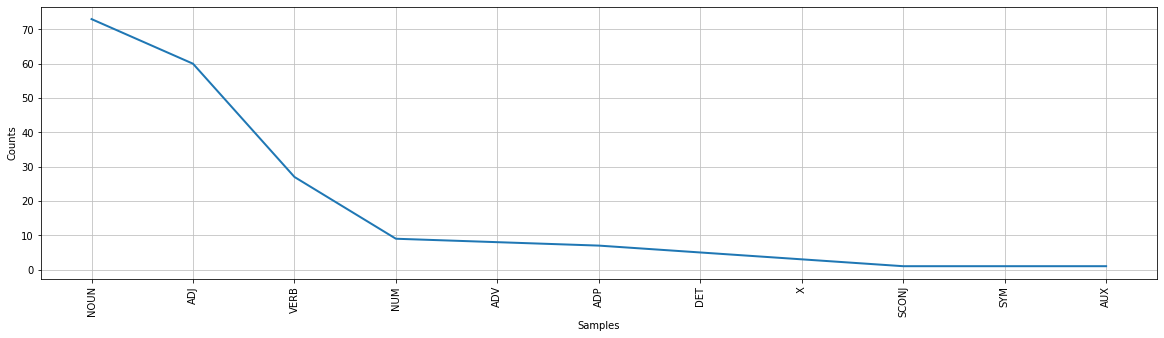

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 5))
fdist.plot(100)

In [ ]:
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
text = df["abstract_fr_proc_6"][0]
text = tokenizer.tokenize(text)

In [ ]:
test = word_tokenize(df["abstract_fr_proc_6"][0])
test

In [ ]:
bigrams = list(nltk.bigrams(test))
bigrams

In [ ]:
trigrams = list(nltk.trigrams(test))
trigrams

In [ ]:
ngrams = list(nltk.ngrams(test,5))
ngrams

In [ ]:
bigram_series = pd.Series(bigrams).value_counts()[:10]
bigram_series

(grande, vitesse)              2
(sous, forme)                  2
(arrivait, grande)             2
(interpretation, textes)       1
(particulierement, travaux)    1
(methode, generale)            1
(proches, encore)              1
(enjalbert, enj)               1
(textes, issus)                1
(preoccupations, victorri)     1
dtype: int64

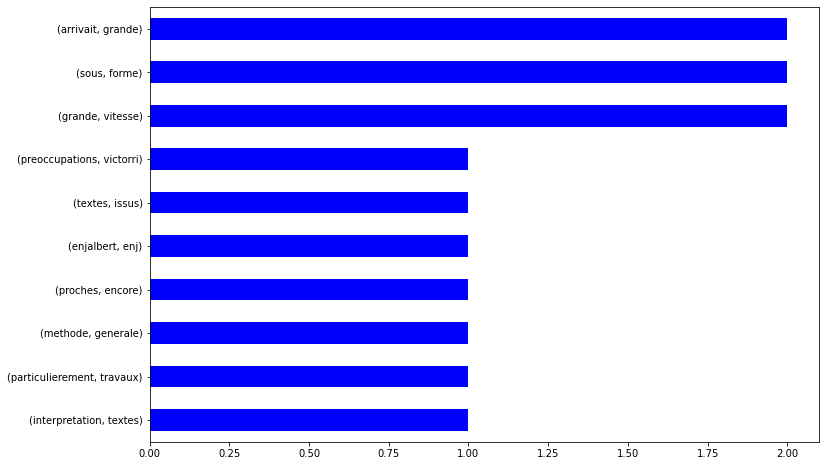

In [ ]:
bigram_series.sort_values().plot.barh(color='blue', figsize=(12, 8))


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
test

In [ ]:
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
text = df["abstract_fr_proc_6"][0]
test2 = tokenizer.tokenize(text)
test2

['considerons travail tache traitement automatique visant construire partir textes issus un corpus constats accidents route interpretations compatibles derniers proposer illustrations sous forme sequences images fixes recherche fruit une collaboration entre laboratoire universitaire entreprise prend appui modele grammaire applicative cognitive 90 vise particulier expliquer certain niveau cognitif transferts entre representations imagees verbales revue question relative transcription automatique verbal image renvoyons arn 90 plus particulierement travaux vandeloise van 87 groupe langue raisonnement calcul universite paul sabatier aur 90 sab 95 ainsi qu aux approches proposees arn 93 systeme sprint yam 92 plus proches encore preoccupations victorri enjalbert enj 94 poi 95 posent probleme animation visuelle issue interpretation textes presentons cet article travers traitement un exemple methode generale analyse adoptee appuie priorite connaissances linguistiques texte pris comme exemple s

In [ ]:
test3 = word_tokenize(df["abstract_fr_proc_6"][0])
test3

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(test3)
feature_names = vectorizer.get_feature_names()

df_test = pd.DataFrame(data = vectors.toarray(), columns=vectorizer.get_feature_names())



In [ ]:
df_test

,87,90,92,93,94,95,accidents,adoptee,ai,ainsi,analyse,animation,applicative,approches,appui,appuie,architecture,arn,arrivait,arrivant,article,articulation,aur,automatique,aux,calcul,certain,cet,chaussee,circulation,cognitif,cognitive,collaboration,comme,compatibles,completement,connaissances,considerons,constats,construire,...,segmentation,sequences,serrant,significations,solution,sous,spatio,sprint,suivant,systeme,tache,temporelles,texte,textes,traitement,traitons,transcription,transferts,travail,travaux,travers,troisieme,un,une,universitaire,universite,van,vandeloise,vehicule,vehicules,verbal,verbales,victorri,virage,visant,vise,visuelle,vitesse,voiture,yam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectors

<195x165 sparse matrix of type '<class 'numpy.float64'>'
	with 195 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.cluster import KMeans
from sklearn import cluster
kmeans = KMeans(n_clusters=2).fit(vectors)


In [ ]:
kmeans = cluster.KMeans(n_clusters = 10
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')
kmeans.fit(df_test)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [ ]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [ ]:
k = 8
kmeans_results = run_KMeans(k, df_test)

In [ ]:
kmeans_results

{2: KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
        random_state=1, tol=0.0001, verbose=0),
 3: KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
        random_state=1, tol=0.0001, verbose=0),
 4: KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
        random_state=1, tol=0.0001, verbose=0),
 5: KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
        random_state=1, tol=0.0001, verbose=0),
 6: KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
        random_state=1, tol=0.0001, verbose=0),
 7: KMeans(algorithm='ful

In [ ]:
#setup kmeans clustering
words = vectorizer.get_feature_names()
kmeans = KMeans(n_clusters = 15, n_init = 17, n_jobs = -1, tol = 0.01, max_iter = 200)
#fit the data 
kmeans.fit(vectors)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-10:-1]
clusters_words = []
nb_clusters = []
i= 0
for num, centroid in enumerate(common_words):
    #print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
    clusters_words.append(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
    nb_clusters.append(i)
    i += 1

nb_clusters
df_clusters = pd.DataFrame({'nb_clusters':nb_clusters, 'clusters_words':clusters_words})



In [ ]:
df_clusters

,nb_clusters,clusters_words
0,0,"0 : relative, analyse, traitement, article, im..."
1,1,"1 : exemple, yam, globale, garantissant, fruit..."
2,2,"2 : 90, yam, entreprise, generale, garantissan..."
3,3,"3 : automatique, yam, globale, garantissant, f..."
4,4,"4 : un, yam, entreprise, garantissant, fruit, ..."
5,5,"5 : forme, yam, globale, garantissant, fruit, ..."
6,6,"6 : partie, entreprise, generale, garantissant..."
7,7,"7 : presentons, yam, generale, garantissant, f..."
8,8,"8 : cognitif, globale, garantissant, fruit, fo..."
9,9,"9 : grande, yam, entreprise, garantissant, fru..."


In [ ]:
for k in range(0,len(df_clusters)):
  text = 

In [ ]:
kmeans = cluster.KMeans(
    n_clusters = 8,
    init = 'k-means++',
    max_iter=200,
    n_init=20,
    random_state=42
)
kmeans.fit(np.array(list(vectorizer))

SyntaxError: ignored

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(test3)
feature_names = vectorizer.get_feature_names()

df_test = pd.DataFrame(data = vectors.toarray(), columns=vectorizer.get_feature_names())


In [ ]:
df_test

,87,90,92,93,94,95,accidents,adoptee,ai,ainsi,analyse,animation,applicative,approches,appui,appuie,architecture,arn,arrivait,arrivant,article,articulation,aur,automatique,aux,calcul,certain,cet,chaussee,circulation,cognitif,cognitive,collaboration,comme,compatibles,completement,connaissances,considerons,constats,construire,...,segmentation,sequences,serrant,significations,solution,sous,spatio,sprint,suivant,systeme,tache,temporelles,texte,textes,traitement,traitons,transcription,transferts,travail,travaux,travers,troisieme,un,une,universitaire,universite,van,vandeloise,vehicule,vehicules,verbal,verbales,victorri,virage,visant,vise,visuelle,vitesse,voiture,yam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
teste = df_test.tolist()
teste

AttributeError: ignored

In [ ]:
prediction = kmeans.predict(final_df)
prediction

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  1,  0,  8,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,
        0,  0,  9,  0,  0,  0,  0,  0, 14, 13,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 13,  0, 12,  0,  0,  0,  0,  0, 14,  0,
        3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0,
        0,  0,  0,  0,  5,  7,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  4, 10,  0,  0,  0,  0,  0,  9,  0,
        4, 10,  0,  2,  0,  5,  0,  0,  3,  0,  0,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 11,  1,  0,  0,  0,  0,  0,  0,  0,  2,  5,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [ ]:
import numpy as np
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [ ]:
import seaborn as sns
def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

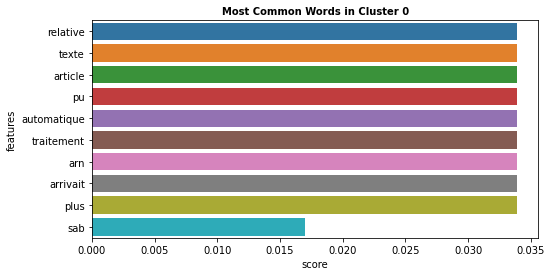

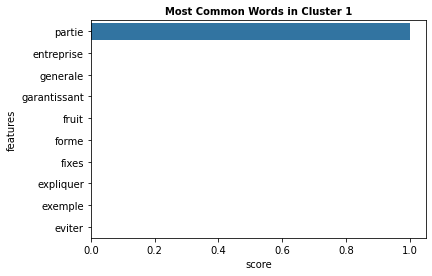

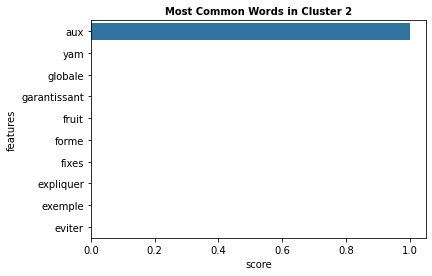

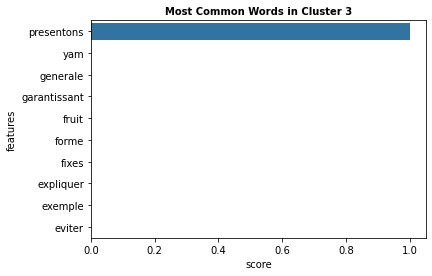

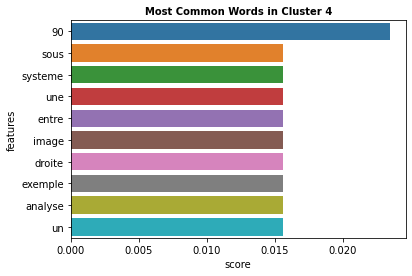

In [ ]:
best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 10)

In [ ]:
dfs

In [ ]:
##JL
#Problématique 1 : Identifier les thèmes des corpus
#Problématique 2 : Résumé le corpus en quelques mots clés
#Problématique 3 : Analyse de sentiment

In [ ]:
# A faire:
# Tokennizer: gérer la ponctuation, séparer en phrase
#tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
#text=" Hello everyone. Hope all are fine and doing well. Hope you find the book interesting"
#tokenizer.tokenize(text)

#ou 
#from nltk.tokenize import TreebankWordTokenizer
#tokenizer = TreebankWordTokenizer()

In [ ]:
#Clean
#Maj ou Min
#print(text.lower())
#print(text.upper())

#Remplacer mot
#import re
#replacement_patterns = [
#(r'don\'t', 'do not'),
#(r'didn\'t', 'did not'),
#(r'can\'t', 'cannot')
#]
#class RegexpReplacer(object):
#   def __init__(self, patterns=replacement_patterns):
#      self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
#
#   def replace(self, text):
#      s = text
#      for (pattern, repl) in self.patterns:
#           s = re.sub(pattern, repl, s)
#      return s
#replacer=RegexpReplacer()

#Lemmatizer (changer forme du mot) si besoin

In [ ]:
#stopwords
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
#stops=set(stopwords.words('english'))
#words=["Don't", 'hesitate','to','ask','questions']
#[word for word in words if word not in stops]

In [ ]:
#Model

#Distance de jacquart
#from nltk.metrics import *
#s1 =set(article1_tk)
#s2 = set(article2_tk)
#s3 = set(article3_tk)
#print(jaccard_distance(s1,s2))
#print(jaccard_distance(s1,s3))
#plus la distance est petite plus c’est proche

#Part of speech
#from nltk.tag import UnigramTagger
#train_sents = treebank.tagged_sents()[:3000]
#tagger = UnigramTagger(train_sents)
#treebank.sents()[0]
#tagger.tag(treebank.sents()[0]) -> donne le POSP

#Word2Vec
#model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)


#Embedding + Deep learning
#Transformer phrase ou mot en vecteur -> modéle possible : LSTM, Embedding venant du hub

#SentiWordNet

#Tf-idf : score du mot (niveau d'information)
#the specificity of a term can be quantified as an inverse function of the number of documents in which it occurs. 


# LDA :Text clustering
#

#LSA: LSA is mainly useful for automatic categorization of text
#LSA represent a corpus as a matrix of terms in relation to documents
#A column represent a document and a row represent a term.
#A cell is the tf idf of a term in a document.

#TSNE
#https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
#Outil graphique pour classification

#RandomForest

#k-means
